In [1]:
import pandas as pd
import numpy as np
from DS_WCS_projections import *
from DS_data_transformation import *
import DS_Coma_Cluster_param as cc_prm

In [25]:
wcs = custom_wcs(cc_prm.ra_center, cc_prm.dec_center)

/home/rt2122/L/git/data-segmentation-2/modules/DS_WCS_projections.py:39: RuntimeWarning: cdelt will be ignored since cd is present
  w1.wcs.cdelt = w.wcs.cdelt[:2]


In [15]:
dist_between_pix([0, 0], [0, 1], wcs) / 1.561472637857801e-05

1.0000008509437766

In [14]:
wcs.wcs.cd /= 2

In [10]:
dist_between_pix([0, 0], [0, 1], wcs)

4.4978336663587194e-05

In [17]:
wcs.wcs.cd

array([[-1.56147415e-05,  0.00000000e+00],
       [ 0.00000000e+00,  1.56147415e-05]])

In [18]:
dist_between_pix([0, 0], [0, 1], wcs)

1.5614739665832245e-05

In [19]:
df = pd.read_csv('/home/rt2122/Data/coma_sweep/south/circle_2degree_filtered.csv')
df_max = n_max_flux_df(df, 100, ['FLUX_G', 'FLUX_R', 'FLUX_Z'])
df_max.index = np.arange(df_max.shape[0])

In [26]:
pixels = wcs.all_world2pix(np.array(df_max['RA']), np.array(df_max['DEC']), 0)
pixels = np.array(pixels, dtype=np.int32).T

In [27]:
pic_g = draw_circles(pixels, df_max['FLUX_G'], (2048, 2048, 1), 0.02)
pic_r = draw_circles(pixels, df_max['FLUX_R'], (2048, 2048, 1), 0.02)
pic_z = draw_circles(pixels, df_max['FLUX_Z'], (2048, 2048, 1), 0.02)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


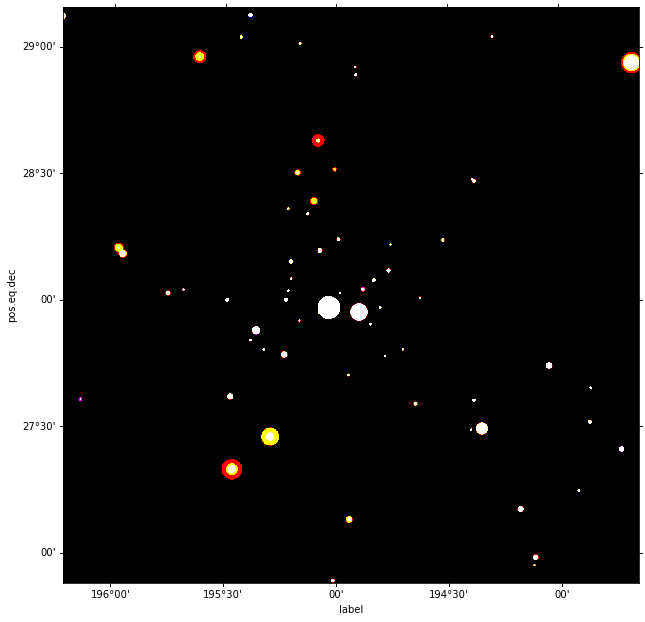

In [29]:
show_pic(np.flipud(np.rot90(np.dstack([pic_g, pic_r, pic_z]))), projection=wcs)

In [23]:
pic_g.max()

0.0

In [24]:
pixels[0]

array([ 31486, -33004], dtype=int32)